<a href="https://colab.research.google.com/github/pzuniga/sales-predictions/blob/main/Project_1_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOOTCAMP DATA SCIENCE - SPANISH - Wk1**
**Predicción de ventas de productos alimenticios**

Pablo Zúñiga N. / ZetaLabs

Fuente de datos:
Big Mart Sales Prediction
26-05-2016 12:01 AM to 31-12-2022 11:59 PM

https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


In [ ]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Crear variable con ruta de acceso al archivo
filename_csv = "/content/drive/MyDrive/Colab Notebooks/Proyecto_1/Datos/sales_predictions.csv"

# **1. Limpieza de datos**

# 1.1. Análisis preliminar: cargar datos, Head(), tail(), info(), shape()

In [ ]:
# 1.1.1. Cargar archivo de datos en df
# Cargar datos CSV  y asignar a dataframe df: sales
df=pd.read_csv(filename_csv)

In [ ]:
# 1.1.2. Revisar la cabeza
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
# 1.1.3. Revisar la cola
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
# 1.1.4. Obtener la descripción de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Diccionario de datos:

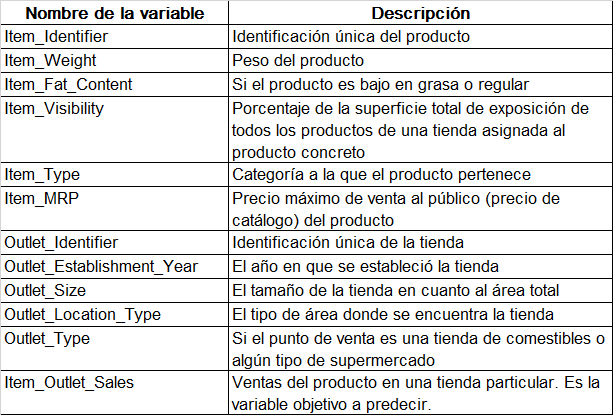

In [ ]:
# 1.1.5. Mostrar la forma del df
# filas:8523 / columnas: 12
df.shape

(8523, 12)

# 1.2. Revisar y tratar filas duplicadas

In [ ]:
# Búsqueda de duplicados
# No existen duplicados en df
df.duplicated().sum()

0

# 1.3. Revisar y tratar valores faltantes
Se incluye una breve descripción del tratamiento: método y justificación.

In [ ]:
# 1.3.1. Identificar y abordar cualquier dato que falte en este conjunto de datos.
# columna 'Item_Weight' 1463 valores NaN
# columna 'Outlet_Size' 2410 valores NaN
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# 1.3.2. Valores faltantes columna 'Item_Weight'

# Cuantificación del porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro
missing_percent_Item_Weight=round(df['Item_Weight'].isna().sum()/df.shape[0]*100,2)
print("Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro",missing_percent_Item_Weight,"%")

Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro 17.17 %


In [ ]:
# Crear filtro para valores NaN en columna 'Item_Weight'
missing_Item_Weight_df=df['Item_Weight'].isna()
# Revisar filas que contienen NaN para y
df.loc[missing_Item_Weight_df,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
# Crear df con columnas 'Item_Identifier' y 'Item_Weight'
one_per_Item_Identifier=df[['Item_Identifier','Item_Weight']]
# Ordenar df por 'Item_Weight' números primero y NaN último
one_per_Item_Identifier=one_per_Item_Identifier.sort_values('Item_Weight',ascending=True)
# Remover los duplicados y dejar primer registro encontrado
one_per_Item_Identifier=one_per_Item_Identifier.drop_duplicates(subset = 'Item_Identifier', keep = 'first')
print('Cantidad de productos únicos:',one_per_Item_Identifier.shape[0])
print("Cantidad de productos únicos con valores nulos")
one_per_Item_Identifier.isna().sum()
# Cuantro productos con valores nulos en 'Item_Weight'

Cantidad de productos únicos: 1559
Cantidad de productos únicos con valores nulos


Item_Identifier    0
Item_Weight        4
dtype: int64

In [ ]:
# Buscar vertical 'Item_Identifier' de df, en  one_per_Item_Identifier, y agregar columna 'Item_Weight' a df
 
Outer_join = pd.merge(df, 
                      one_per_Item_Identifier, 
                      on ='Item_Identifier', 
                      how ='outer')
Outer_join

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
2,FDA15,9.300,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.300
3,FDA15,9.300,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.300
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCF55,6.675,LF,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,6.675
8519,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,5.210
8520,NCW30,5.210,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.210
8521,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.250


In [ ]:
Outer_join['Item_Weight_x']=Outer_join['Item_Weight_y']

In [ ]:
# eliminar columna 'Item_Weight_y'
Outer_join=Outer_join.drop(columns=['Item_Weight_y'])


In [ ]:
# Renombrar columna 'Item_Weight_x'
Outer_join.columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

In [ ]:
# Asiganar a df columna 'Item_Weight' limpia
df = Outer_join

In [ ]:
# Cuantificación del porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro
missing_percent_Item_Weight=round(df['Item_Weight'].isna().sum()/df.shape[0]*100,2)
print("Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro",missing_percent_Item_Weight,"%")

# Crear filtro para valores NaN en columna 'Region'
missing_Item_Weight_df=df['Item_Weight'].isna()
# Revisar filas que contienen NaN para y
df.loc[missing_Item_Weight_df,:]

Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro 0.05 %


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4125,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
6440,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
8278,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
8463,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [ ]:
# 1.4.1. Valores inconsistente de datos 'Item_Fat_Content'

# Diagnóstico: existencia de valores inconsistentes en categorías
# Tratamiento: se homologarán los valores a dos categorías
# Low Fat: LF, low fat
# Regular: reg
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Reemplazar valores inconsistentes
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [ ]:
# Verificar homologación de categorías
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.groupby(['Item_Fat_Content','Item_Type'])['Item_Weight'].describe()

count       mean       std    min  \
Item_Fat_Content Item_Type                                                  
Low Fat          Baking Goods           329.0  12.538283  4.529305  4.920   
                 Breads                 140.0  12.342679  4.277201  4.635   
                 Breakfast               41.0  11.988902  5.342138  6.425   
                 Canned                 341.0  11.948754  4.632061  4.905   
                 Dairy                  418.0  13.438828  4.643602  5.440   
                 Frozen Foods           450.0  12.454422  4.595332  5.155   
                 Fruits and Vegetables  630.0  12.784556  4.702654  5.655   
                 Hard Drinks            214.0  11.456238  4.290768  4.610   
                 Health and Hygiene     520.0  13.052327  4.475660  5.175   
                 Household              910.0  13.524780  5.001001  5.030   
                 Meat                   170.0  13.493235  4.492331  6.170   
                 Others                 169.0  13.979438  4.157975  5.500   
                 Seafood                 37.0  13.749054  4.253680  7.970   
                 Snack Foods            691.0  13.792424  4.563753  6.035   
                 Soft Drinks            374.0  11.942473  4.356482  4.590   
                 Starchy Foods           82.0  13.703049  3.787429  6.695   
Regular          Baking Goods           318.0  12.023601  4.961192  4.880   
                 Breads                 111.0   9.979685  4.398918  5.035   
                 Breakfast               69.0  13.249638  4.728677  6.920   
                 Canned                 308.0  12.906591  4.596100  4.615   
                 Dairy                  263.0  13.286255  4.793967  4.805   
                 Frozen Foods           405.0  13.146827  4.325845  4.555   
                 Fruits and Vegetables  602.0  13.709900  4.403362  5.460   
                 Meat                   255.0  12.289863  4.636384  5.150   
                 Seafood                 27.0  10.840370  6.290237  5.365   
                 Snack Foods            508.0  11.995827  4.263998  5.095   
                 Soft Drinks             71.0  11.549507  5.009157  5.920   
                 Starchy Foods           66.0  14.013258  4.530812  7.060   

                                             25%      50%      75%    max  
Item_Fat_Content Item_Type                                                 
Low Fat          Baking Goods            9.10000  12.3000  15.6000  20.85  
                 Breads                  9.30000  12.6000  15.8500  19.50  
                 Breakfast               8.06000   8.8950  18.6000  20.75  
                 Canned                  7.65500  11.6000  15.8500  21.35  
                 Dairy                   9.01500  13.3500  17.6000  20.70  
                 Frozen Foods            8.68000  12.3000  17.1000  20.85  
                 Fruits and Vegetables   8.21375  12.5000  16.8500  21.35  
                 Hard Drinks             8.26000   9.8975  15.0000  19.70  
                 Health and Hygiene      9.69500  12.1500  17.6000  21.25  
                 Household               8.88000  13.5000  18.5375  21.25  
                 Meat                   10.10000  12.6500  17.5000  21.25  
                 Others                 10.89500  14.5000  17.7500  20.50  
                 Seafood                10.39500  12.6000  17.7500  19.85  
                 Snack Foods             9.44750  14.1500  17.8500  21.25  
                 Soft Drinks             8.08500  11.8000  15.3500  20.75  
                 Starchy Foods          12.15000  12.8500  15.8500  20.85  
Regular          Baking Goods            7.52000  10.8000  16.0000  20.85  
                 Breads                  6.57500   8.6000  13.6500  20.85  
                 Breakfast               9.00000  11.6000  17.2500  21.10  
                 Canned                  8.63000  13.5000  17.0000  20.25  
                 Dairy                  10.19500  12.6000

In [ ]:
# Se aplicarán las siguientes reglas para asignar valor de 'Item_Weight' con valores nulos
# Promedio 'Item_Weight' agrupado por 'Item_Fat_Content' e 'Item_Type'
# Regular + Frozen Foods -> 13.146827
# Regular + Dairy -> 13.286255
# Regular + Baking Goods -> 12.023601
# Low Fat + Snack Foods -> 13.792424
df['Item_Weight'][4125]=13.146827
df['Item_Weight'][6440]=13.792424
df['Item_Weight'][8278]=13.286255
df['Item_Weight'][8463]=12.023601


# Mejorar esta parte del código
#iterable=[['Regular','Frozen Foods',13.146827],['Regular','Dairy', 13.286255],['Regular','Baking Goods', 12.023601],['Low Fat','Snack Foods', 13.792424]]
#for i in range(0,len(iterable)):
#  df.loc[(df['Item_Fat_Content']==iterable[i][0])&(df['Item_Type']==iterable[i][1])&(df['Outlet_Size'].isna()),'Item_Weight']=iterable[i][2]
#  print(df.loc[(df['Item_Fat_Content']==iterable[i][0])&(df['Item_Type']==iterable[i][1])&(df['Outlet_Size'].isna()),'Item_Weight'],iterable[i][2])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Setti

In [ ]:
# Verificación de valores nulos
missing_Item_Weight_df=df['Item_Weight'].isna()
df.loc[missing_Item_Weight_df,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# Verificación de valores nulos en df
# Quedan valores nulos en 'Outlet_Size'
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# 1.3.3. Valores faltantes columna 'Outlet_Size'

# Cuantificación del porcentaje de valores nulos en la columna 'Outlet_Sizet' con respecto al total de registro
missing_percent_Outlet_Size=round(df['Outlet_Size'].isna().sum()/df.shape[0]*100,2)
print("Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro",missing_percent_Outlet_Size,"%")

# Tratamiento:
# Alternativa 1: se procederá a clasificar 'Outlet_Size' utilizando modelo de machine learning. Por mientras, se dejarán como nulos.
# Alternativa 2: Se procederá a clasificar utilizando obras columnas como referencia, tales como: 'Outlet_Location_Type' y 'Outlet_Type'.

Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro 28.28 %


In [ ]:
# Cuenta de valores no nulos
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Cuenta de valores nulos
df['Outlet_Size'].isna().sum()

2410

In [ ]:
# Crear filtro para valores NaN en columna 'Item_Weight'
missing_Outlet_Size_df=df['Outlet_Size'].isna()
# Revisar filas que contienen NaN para y
df.loc[missing_Outlet_Size_df,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
7,FDA15,9.300,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208
9,DRC01,5.920,Regular,0.019309,Soft Drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760
11,DRC01,5.920,Regular,0.019239,Soft Drinks,49.8692,OUT045,2002,NaN,Tier 2,Supermarket Type1,1133.1916
...,...,...,...,...,...,...,...,...,...,...,...,...
8507,NCU53,5.485,Low Fat,0.042839,Health and Hygiene,163.7842,OUT045,2002,NaN,Tier 2,Supermarket Type1,1657.8420
8512,FDD28,10.695,Low Fat,0.000000,Frozen Foods,60.5904,OUT017,2007,NaN,Tier 2,Supermarket Type1,410.1328
8516,NCF55,6.675,Low Fat,0.021710,Household,34.9874,OUT045,2002,NaN,Tier 2,Supermarket Type1,247.0118
8519,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354


In [ ]:
# Asignar categoría auxiliar 'Asignar' a valores nulos para mostrarlos en tabla
df['Outlet_Size'].fillna('Asignar', inplace=True)
round(df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count(),0)

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Asignar        1855
                                         Small           930
Tier 3                Grocery Store      Asignar         555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [ ]:
# Se aplicarán las siguientes reglas para asignar valor a la clase de 'Outlet_Size' con valores nulos
# Tier 2 +  Supermarket Type1 -> Small
# Tier 3 + Grocery Store -> se homologa a Tier 1 + Grocery Store -> Small
df.loc[(df['Outlet_Location_Type']=='Tier 2')&(df['Outlet_Type']=='Supermarket Type1')&(df['Outlet_Size']=='Asignar'),'Outlet_Size']='Small'
df.loc[(df['Outlet_Location_Type']=='Tier 3')&(df['Outlet_Type']=='Grocery Store')&(df['Outlet_Size']=='Asignar'),'Outlet_Size']='Small'


In [ ]:
# Verificar asignación de clase
round(df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count(),0)

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Small          2785
Tier 3                Grocery Store      Small           555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [ ]:
# Verificar cuenta de valores nulos en df
# No quedan valores nulos en df
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 1.4. Revisar y tratar valores incosistentes
Se incluye una breve descripción del tratamiento: método y justificación.

In [ ]:
# 1.4.1. Revisar valores inconsistente de datos 'Item_Fat_Content'
# Se realizó en paso anterior para utilizarlo como input en proceso de limpieza de nulos en columna 'Item_Weight'
# revisar 1.3.2.

In [ ]:
# 1.4.2. Revisar valores inconsistente de datos 'Item_Visibility'

# Diagnóstico: existencia de valores inconsistentes en categorías, 0%
# Tratamiento: se homologarán los valores a dos categorías
# Low Fat: LF, low fat
# Regular: reg
round(df['Item_Visibility'].describe()*100,4)

count    852300.0000
mean          6.6132
std           5.1598
min           0.0000
25%           2.6989
50%           5.3931
75%           9.4585
max          32.8391
Name: Item_Visibility, dtype: float64

In [ ]:
round(df.groupby(['Item_Type'])['Item_Visibility'].describe()*100,2)

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,64800.0,6.92,5.22,0.0,3.14,5.87,9.98,31.11
Breads,25100.0,6.63,4.88,0.0,2.46,5.59,9.27,28.15
Breakfast,11000.0,8.57,5.28,0.0,5.85,6.89,12.11,27.46
Canned,64900.0,6.81,5.37,0.0,2.75,5.08,10.24,32.84
Dairy,68200.0,7.24,5.32,0.0,3.13,6.32,10.20,30.47
Frozen Foods,85600.0,6.56,4.88,0.0,2.65,5.65,9.27,29.49
Fruits and Vegetables,123200.0,6.85,5.27,0.0,3.01,5.41,10.04,32.11
Hard Drinks,21400.0,6.49,5.00,0.0,3.07,5.93,8.68,29.82
Health and Hygiene,52000.0,5.52,4.44,0.0,2.29,4.47,7.69,25.53


In [ ]:
# Crear filtro para valores nulos (ceros) en columna 'Item_Visibility'
missing_Item_Visibility_df=df['Item_Visibility']==0
# Revisar filas que contienen NaN para y
df.loc[missing_Item_Visibility_df,:]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
21,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
24,FDX07,19.200,Regular,0.0,Fruits and Vegetables,184.5950,OUT018,2009,Medium,Tier 3,Supermarket Type2,3844.9950
27,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
29,NCD19,8.930,Low Fat,0.0,Household,55.4614,OUT045,2002,Small,Tier 2,Supermarket Type1,331.5684
32,NCD19,8.930,Low Fat,0.0,Household,53.2614,OUT049,1999,Medium,Tier 1,Supermarket Type1,552.6140
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,FDN40,5.880,Low Fat,0.0,Frozen Foods,154.2998,OUT046,1997,Small,Tier 1,Supermarket Type1,1999.3974
8478,FDP15,15.200,Low Fat,0.0,Meat,256.0330,OUT010,1998,Small,Tier 3,Grocery Store,1281.6650
8497,FDH31,12.000,Regular,0.0,Meat,98.2042,OUT019,1985,Small,Tier 1,Grocery Store,198.4084
8512,FDD28,10.695,Low Fat,0.0,Frozen Foods,60.5904,OUT017,2007,Small,Tier 2,Supermarket Type1,410.1328


In [ ]:
# Crear filtro para valores no nulos columna 'Item_Weight'
no_missing_Item_Visibility_df=df['Item_Visibility']!=0
# Revisar filas que contienen no nulos
df.loc[no_missing_Item_Visibility_df,:].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7997.000000,7997.000000,7997.000000,7997.000000,7997.000000
mean,12.903864,0.070482,141.181925,1997.826185,2178.575445
std,4.645259,0.050308,62.201545,8.364645,1704.227930
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.850000,0.031403,94.109400,1987.000000,829.586800
50%,12.650000,0.057792,143.215400,1999.000000,1794.331000
75%,17.000000,0.098109,185.758200,2004.000000,3098.633200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Estadística descriptiva para columna 'Item_Visibility', excluyendo a valores nulos (ceros), agrupados
# por columnas 'Outlet_Size' e 'Item_Type'
round(df.loc[no_missing_Item_Visibility_df,:].groupby(['Outlet_Size','Item_Type'])['Item_Visibility'].describe(),4)

count    mean     std     min     25%  \
Outlet_Size Item_Type                                                      
High        Baking Goods            66.0  0.0658  0.0416  0.0057  0.0332   
            Breads                  24.0  0.0683  0.0367  0.0207  0.0457   
            Breakfast               13.0  0.0751  0.0371  0.0214  0.0606   
            Canned                  59.0  0.0625  0.0438  0.0082  0.0301   
            Dairy                   76.0  0.0725  0.0442  0.0052  0.0382   
            Frozen Foods            88.0  0.0686  0.0425  0.0073  0.0356   
            Fruits and Vegetables  132.0  0.0659  0.0425  0.0055  0.0353   
            Hard Drinks             23.0  0.0623  0.0438  0.0036  0.0258   
            Health and Hygiene      56.0  0.0556  0.0376  0.0086  0.0300   
            Household               95.0  0.0583  0.0442  0.0060  0.0264   
            Meat                    39.0  0.0587  0.0457  0.0073  0.0258   
            Others                  16.0  0.0497  0.0504  0.0068  0.0151   
            Seafood                  5.0  0.0665  0.0445  0.0312  0.0338   
            Snack Foods            118.0  0.0632  0.0423  0.0060  0.0329   
            Soft Drinks             45.0  0.0583  0.0422  0.0070  0.0248   
            Starchy Foods           18.0  0.0777  0.0486  0.0056  0.0394   
Medium      Baking Goods           186.0  0.0657  0.0403  0.0056  0.0332   
            Breads                  76.0  0.0628  0.0391  0.0111  0.0294   
            Breakfast               34.0  0.0759  0.0419  0.0206  0.0564   
            Canned                 206.0  0.0668  0.0471  0.0082  0.0286   
            Dairy                  203.0  0.0685  0.0445  0.0052  0.0340   
            Frozen Foods           260.0  0.0632  0.0402  0.0054  0.0304   
            Fruits and Vegetables  379.0  0.0662  0.0423  0.0055  0.0313   
            Hard Drinks             68.0  0.0649  0.0396  0.0036  0.0346   
            Health and Hygiene     155.0  0.0528  0.0372  0.0085  0.0245   
            Household              276.0  0.0591  0.0446  0.0059  0.0257   
            Meat                   145.0  0.0663  0.0500  0.0073  0.0269   
            Others                  49.0  0.0609  0.0443  0.0067  0.0232   
            Seafood                 20.0  0.0860  0.0477  0.0216  0.0540   
            Snack Foods            386.0  0.0648  0.0417  0.0059  0.0331   
            Soft Drinks            129.0  0.0638  0.0413  0.0071  0.0306   
            Starchy Foods           43.0  0.0641  0.0455  0.0056  0.0281   
Small       Baking Goods           351.0  0.0805  0.0558  0.0057  0.0392   
            Breads                 134.0  0.0763  0.0521  0.0111  0.0356   
            Breakfast               60.0  0.0979  0.0573  0.0207  0.0612   
            Canned                 351.0  0.0762  0.0567  0.0082  0.0305   
            Dairy                  365.0  0.0821  0.0560  0.0052  0.0385   
            Frozen Foods           457.0  0.0738  0.0514  0.0055  0.0360   
            Fruits and Vegetables  634.0  0.0799  0.0563  0.0055  0.0377   
            Hard Drinks            106.0  0.0759  0.0535  0.0036  0.0376   
            Health and Hygiene     276.0  0.0631  0.0472  0.0086  0.0300   
            Household              488.0  0.0696  0.0557  0.0060  0.0272   
            Meat                   221.0  0.0659  0.0556  0.0073  0.0245   
            Others                  94.0  0.0681  0.0511  0.0098  0.0279   
            Seafood                 35.0  0.0785  0.0663  0.0215  0.0339   
            Snack Foods            628.0  0.0760  0.0546  0.0060  0.0356   
            Soft Drinks            237.0  0.0743  0.0551  0.0070  0.0340   
            Starchy Foods           72.0  0.0812  0.0558  0.0056  0.0433   

                                      50%     75%     max  
Outlet_Size Item_Type                                      
High        Baking Goods           0.0575  0.0823  0.1857  
            Breads                 0.0601  0.0844  0.1

In [ ]:
# Crear tabla de valores promedio para aplicar a valores nulos de 'Item_Visibility'
Item_Visibility_values=round(df.loc[no_missing_Item_Visibility_df,:].groupby(['Outlet_Size','Item_Type'],as_index=False)['Outlet_Size','Item_Type','Item_Visibility'].mean(),4)
Item_Visibility_values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Outlet_Size,Item_Type,Item_Visibility
0,High,Baking Goods,0.0658
1,High,Breads,0.0683
2,High,Breakfast,0.0751
3,High,Canned,0.0625
4,High,Dairy,0.0725
5,High,Frozen Foods,0.0686
6,High,Fruits and Vegetables,0.0659
7,High,Hard Drinks,0.0623
8,High,Health and Hygiene,0.0556
9,High,Household,0.0583


In [ ]:
# Iterar por df y modificar 'Item_Visibility' con valores nulos por promedio de agrupado por 'Outlet_Size' e 'Item_Type
for i in df.index:
  if df['Item_Visibility'][i]==0:
    df['Item_Visibility'][i]=Item_Visibility_values.loc[(Item_Visibility_values['Outlet_Size']==df['Outlet_Size'][i])&(Item_Visibility_values['Item_Type']==df['Item_Type'][i]),'Item_Visibility']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Verificar valores nulos de 'Item_Visibility'
# No existen valores nulos
# Crear filtro para valores nulos (ceros) en columna 'Item_Visibility'
missing_Item_Visibility_df=df['Item_Visibility']==0
# Revisar filas que contienen NaN para y
df.loc[missing_Item_Visibility_df,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# 1.4.3. Revisar valores inconsistente de datos 'Item_Visibility'
# No se aprecian inconsistencias en las clases
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
# 1.4.4. Revisar valores inconsistente de datos 'Item_MRP'
# No se aprecian inconsistencias en los valores (por ejemplo, negativos o ceros)
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
# 1.4.5. Revisar valores inconsistente de datos 'Outlet_Identifier'
# No se aprecian inconsistencias en las clases
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
# 1.4.6. Revisar valores inconsistente de datos 'Outlet_Identifier'
# No se aprecian inconsistencias en los valores
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
2004     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
# 1.4.7. Revisar valores inconsistente de datos 'Outlet_Size'
# No se aprecian inconsistencias en las clases
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# 1.4.8. Revisar valores inconsistente de datos 'Outlet_Location_Type'
# No se aprecian inconsistencias en las clases
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# 1.4.9. Revisar valores inconsistente de datos 'Outlet_Type'
# No se aprecian inconsistencias en las clases
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
# 1.4.10. Revisar valores inconsistente de datos 'Item_Outlet_Sales'
# No se aprecian inconsistencias en los valores
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875508,0.070463,140.992782,1997.831867,2181.288914
std,4.645031,0.048766,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.033085,93.826500,1987.000000,834.247400
50%,12.650000,0.061313,143.012800,1999.000000,1794.331000
75%,16.850000,0.094632,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **2. Exploración de datos**

# 2.1. Histogramas de frecuencia

Cantidad total de productos: 8523
Cantidad de productos Low Fat: 3006
Cantidad de productos Regular: 5517


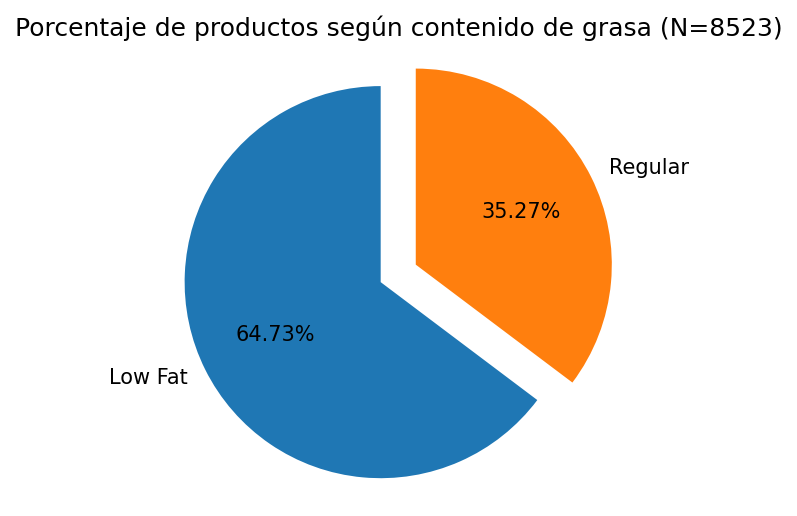

In [ ]:
# 2.1.1. Cantidad de productos según contenido de grasas (N=8523)
# Una parte significativa de los productos (>60%) tiene clasificación Low Fat en su contenido de grasa

# Datos y etiquetas
# Nota_ modificar y cambiar los valores, están invertidos
data=np.array((df['Item_Fat_Content'][df['Item_Fat_Content']=='Low Fat'].value_counts()[0],df['Item_Fat_Content'][df['Item_Fat_Content']=='Regular'].value_counts()[0]))
print("Cantidad total de productos:",data.sum())
print("Cantidad de productos Low Fat:",data[1])
print("Cantidad de productos Regular:",data[0])
data=np.round(data/data.sum(),4)*100
label=['Low Fat','Regular']
explotar = [.2, 0]

# Parametrización del gráfico
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 
ax1.pie(data, labels=label, explode=explotar,  autopct='%.2f%%', shadow = False, startangle=90)    #Formato de la torta sombra/inicio de las porciones, autopct=absolute_value
ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)
ax1.set_title("Porcentaje de productos según contenido de grasa (N=8523)")
plt.show()

Venta total de productos: 18591125.0 USD


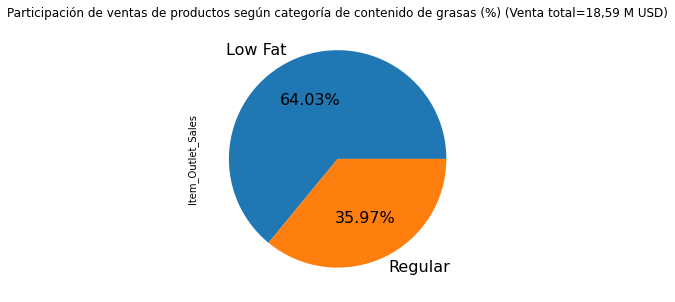

In [ ]:
# 2.1.2. Ventas de productos según categoría de contenido de grasas (N=8523)
# Una parte significativa de los productos vendidos (64.03%) tiene clasificación Low Fat en su contenido de grasa

# Gráfico de torta de "Participación de ventas de productos según categoría (%) (N=8523)"
print("Venta total de productos:", round(df['Item_Outlet_Sales'].sum(),0),"USD")
df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='pie',
                                                                                       title="Participación de ventas de productos según categoría de contenido de grasas (%) (Venta total=18,59 M USD)",
                                                                                       xlabel='Ventas de productos',
                                                                                       autopct='%0.2f%%',
                                                                                       figsize=(5,5),
                                                                                       fontsize=16,
                                                                                       subplots=False)
plt.show()

In [ ]:
# 2.1.3. Cantidad de productos según categoría de producto (N=8523)
# El 83% de los productos se encuentran en nueve categorías de productos (en total 16), siendo las más relevantes:
# Fruits and Vegetables (14.46%), Snack Foods (14.08%), Household (10.68%), Frozen Foods (10.04%), Dairy (8.00%)
# Canned (7.61%), Baking Goods (7.60%), Health and Hygiene (6.10%), Soft Drinks (5.22%), Otras categorías (17.00%)

# Porcentaje de participación de productos por categoría
round(df['Item_Type'].value_counts()/df['Item_Type'].value_counts().sum()*100,2)

Fruits and Vegetables    14.46
Snack Foods              14.08
Household                10.68
Frozen Foods             10.04
Dairy                     8.00
Canned                    7.61
Baking Goods              7.60
Health and Hygiene        6.10
Soft Drinks               5.22
Meat                      4.99
Breads                    2.94
Hard Drinks               2.51
Others                    1.98
Starchy Foods             1.74
Breakfast                 1.29
Seafood                   0.75
Name: Item_Type, dtype: float64

In [ ]:
# Porcentaje acumulado de participación de productos por 'Item_Type'
# 80/20
round(df['Item_Type'].value_counts().cumsum()/df['Item_Type'].value_counts().sum()*100,2)

Fruits and Vegetables     14.46
Snack Foods               28.53
Household                 39.21
Frozen Foods              49.25
Dairy                     57.26
Canned                    64.87
Baking Goods              72.47
Health and Hygiene        78.58
Soft Drinks               83.80
Meat                      88.78
Breads                    91.73
Hard Drinks               94.24
Others                    96.22
Starchy Foods             97.96
Breakfast                 99.25
Seafood                  100.00
Name: Item_Type, dtype: float64

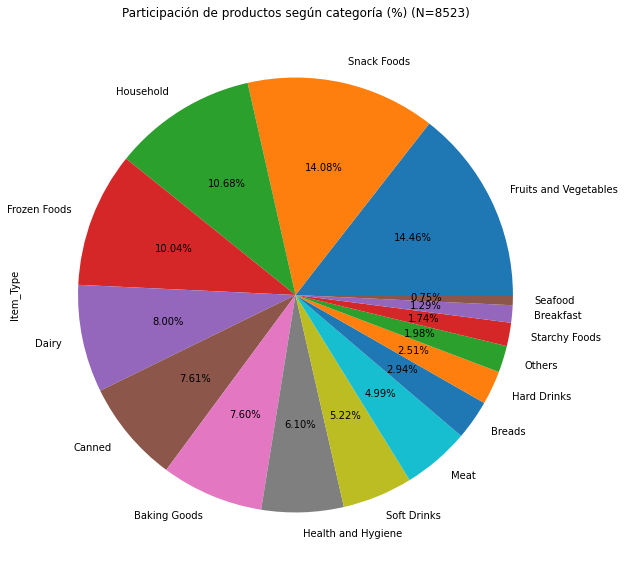

In [ ]:
# Gráfico de torta de Participación de productos según categoría (%) (N=8523):
df['Item_Type'].value_counts().plot(kind='pie',
                                    title="Participación de productos según categoría (%) (N=8523)",
                                    autopct='%0.2f%%',
                                    figsize=(10,10))
plt.show()

In [ ]:
# 2.1.4. Ventas de productos según categoría de producto (N=8523)
# El 84% de las ventas de productos se encuentran en nueve categorías de productos (de un total 16), siendo las más relevantes:
# Fruits and Vegetables (15.17%), Snack Foods (14.70%), Household (11.06%), Frozen Foods (9.82%), Dairy (8.19%)
# Canned (7.77%), Baking Goods (6.81%), Health and Hygiene (5.62%), Meat (4.94%), Otras categorías (16.00%)

# Porcentaje de ventas de productos según categoría
round(df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)/df['Item_Outlet_Sales'].sum()*100,2)

Item_Type
Fruits and Vegetables    15.17
Snack Foods              14.70
Household                11.06
Frozen Foods              9.82
Dairy                     8.19
Canned                    7.77
Baking Goods              6.81
Health and Hygiene        5.62
Meat                      4.94
Soft Drinks               4.80
Breads                    2.98
Hard Drinks               2.46
Starchy Foods             1.89
Others                    1.75
Breakfast                 1.25
Seafood                   0.80
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Porcentaje de ventas de productos acumulado según categoría
round(df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).cumsum()/df['Item_Outlet_Sales'].sum()*100,2)

Item_Type
Fruits and Vegetables     15.17
Snack Foods               29.87
Household                 40.92
Frozen Foods              50.75
Dairy                     58.93
Canned                    66.70
Baking Goods              73.51
Health and Hygiene        79.13
Meat                      84.07
Soft Drinks               88.87
Breads                    91.85
Hard Drinks               94.31
Starchy Foods             96.20
Others                    97.95
Breakfast                 99.20
Seafood                  100.00
Name: Item_Outlet_Sales, dtype: float64

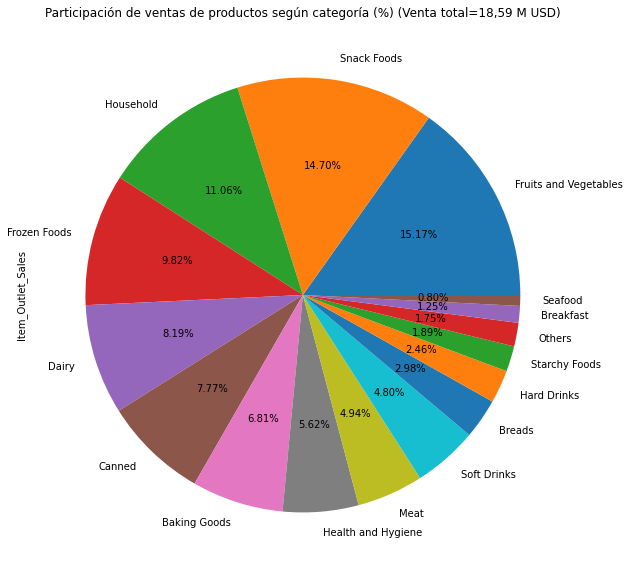

In [ ]:
# Gráfico de torta de "Participación de ventas de productos según categoría (%) (N=8523)"
df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='pie',
                                                                                       title="Participación de ventas de productos según categoría (%) (Venta total=18,59 M USD)",
                                                                                       autopct='%0.2f%%',
                                                                                       figsize=(10,10),
                                                                                       subplots=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


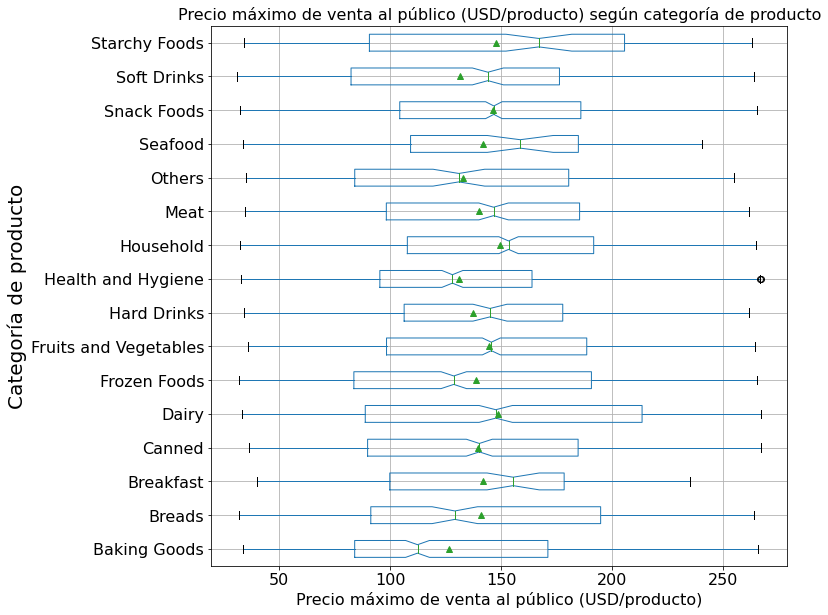

In [ ]:
# 2.1.5. Boxplot de Precio máximo de venta al público (USD/producto) según categoría de producto
# Dado que los boxplot se solapan en todas las categorías de productos se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y las categorías de producto.
# Presencia de valores atípicos sobre el (P75 + 1.5*RIQ) en categoría 'Health and Hygiene'
df.boxplot(column=['Item_MRP'],
                   by='Item_Type',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según categoría de producto',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Categoría de producto', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


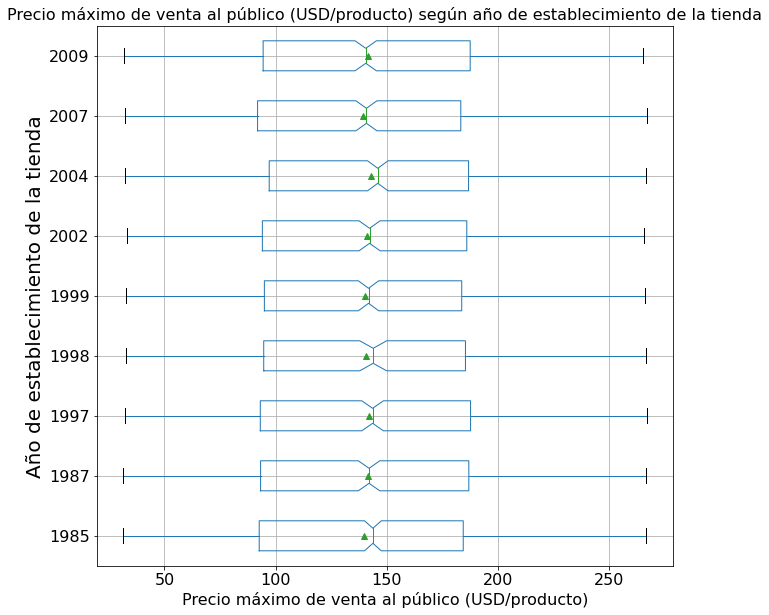

In [ ]:
# 2.1.6. Boxplot de Precio máximo de venta al público (USD/producto) según Año en que se estableció la tienda
# Dado que los boxplot se solapan en todas los años en que se establecieron las tiendas se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y los años de establecimiento de las tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Establishment_Year',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según año de establecimiento de la tienda',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Año de establecimiento de la tienda', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


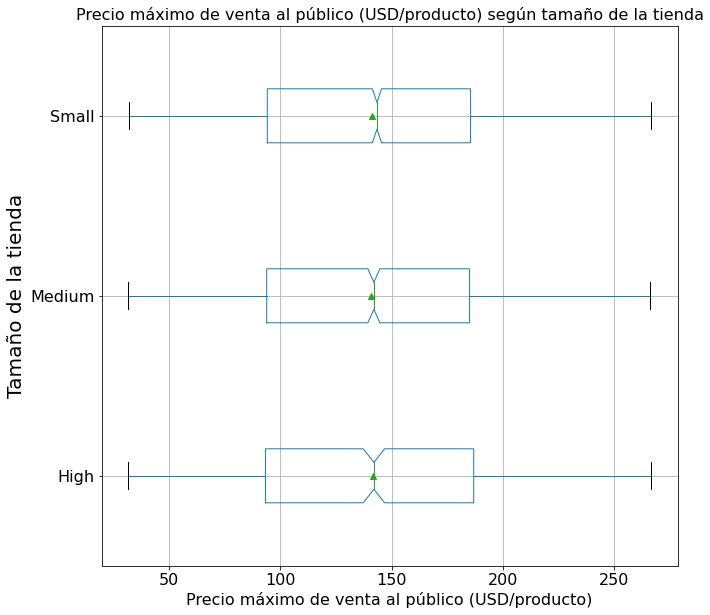

In [ ]:
# 2.1.7. Boxplot de Precio máximo de venta al público (USD/producto) según Tamaño de la tienda en cuanto al área total
# Dado que los boxplot se solapan en todas los tamaños de tienda se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y los tamaños de tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Size',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según tamaño de la tienda',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Tamaño de la tienda', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


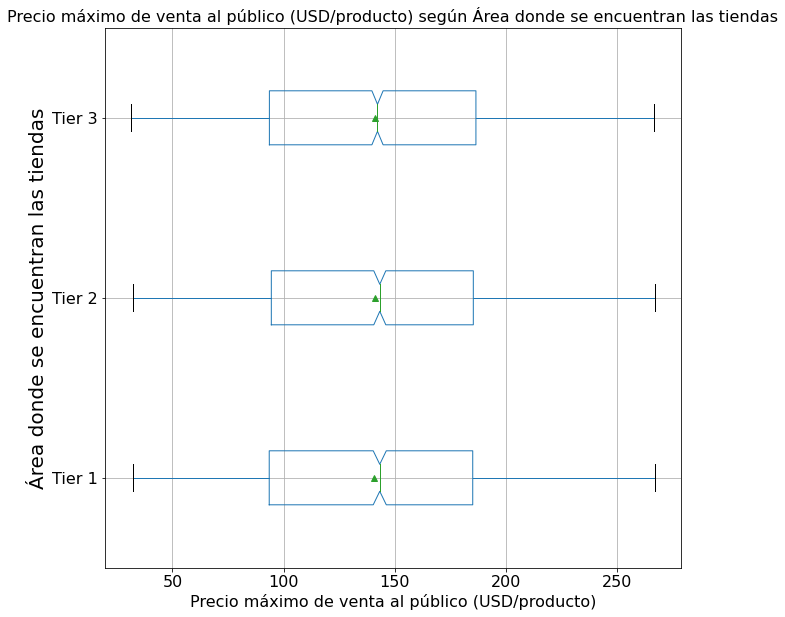

In [ ]:
# 2.1.8. Boxplot de Precio máximo de venta al público (USD/producto) según tipo de Área donde se encuentra la tienda
# Dado que los boxplot se solapan en todas las áreas donde se encuentra las tiendas se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y las áreas donde se encuentran las tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Location_Type',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según Área donde se encuentran las tiendas',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Área donde se encuentran las tiendas', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


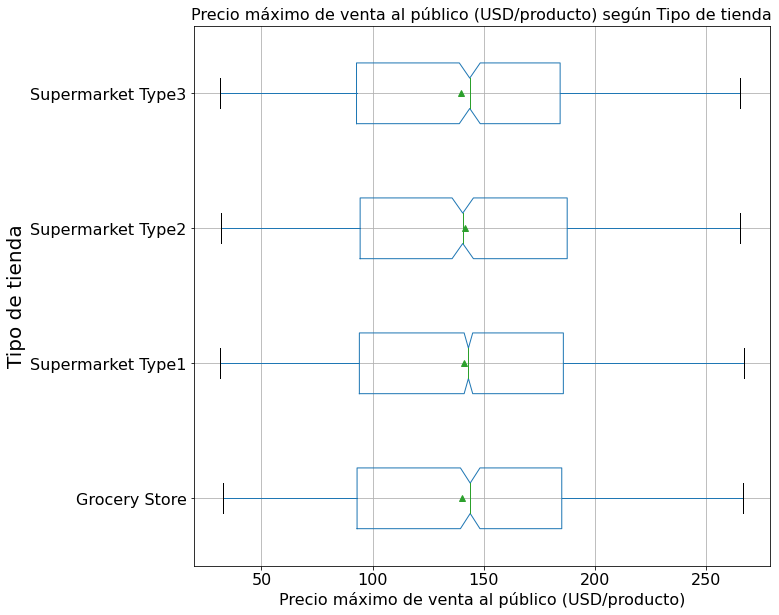

In [ ]:
# 2.1.9. Boxplot de Precio máximo de venta al público (USD/producto) según tipo de tienda
# Dado que los boxplot se solapan en todas las áreas donde se encuentra las tiendas se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y los tipos de tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Type',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según Tipo de tienda',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Tipo de tienda', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

# 2.1. Correlaciones

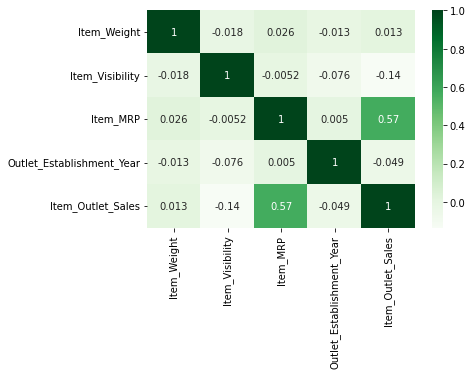

In [ ]:
# La correlación más marcada es entre las columnas 'Item_Oulet_Sales' y 'Item_MRP'
# 'Item_Oulet_Sales' = Ventas del producto en una tienda en particular (variable objetivo a predecir)
# 'Item_MRP' = Precio máximo de venta al público (precio de catálogo) del producto
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

<function matplotlib.pyplot.show(*args, **kw)>

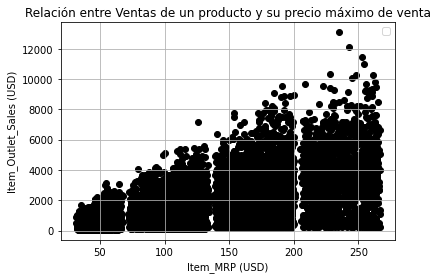

In [ ]:
# Gráfico de dispersión para entender la correlación
X=df['Item_MRP']
Y=df['Item_Outlet_Sales']
# Parametrización de curvas
plt.scatter(X,Y,c='k')
#Parámetros generales
plt.title("Relación entre Ventas de un producto y su precio máximo de venta")
plt.xlabel('Item_MRP (USD)')
plt.ylabel('Item_Outlet_Sales (USD)')
plt.legend()
plt.grid(True)
plt.show